In [1]:
!python flow/visualize/visualizer_rllib.py\
/home/michael/ray_results/singleagent_onelane_ring/PPO_WaveAttenuationPOEnv-v0_4d23b_00000_0_2022-12-28_02-04-49/ 123\
--num_rollouts 1

2023-01-03 22:22:08,008	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265
2023-01-03 22:22:08,564	INFO trainer.py:720 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2023-01-03 22:22:09,760	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2023-01-03 22:22:09,837	INFO trainable.py:383 -- Restored on 192.168.1.65 from checkpoint: /home/michael/ray_results/singleagent_onelane_ring/PPO_WaveAttenuationPOEnv-v0_4d23b_00000_0_2022-12-28_02-04-49/checkpoint_123/checkpoint-123
2023-01-03 22:22:09,837	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 123, '_timesteps_total': None, '_time_total': 41940.90504384041, '_episodes_total': 615}

-----------------------
ring length: 260
v_max: 5.139779427502188
-----------------------
2023-01-03 22:23:53,227	WARNING deprecation.py:34 -- DeprecationWarning: `compute_action` has been deprecated. Use `compute_single_action` instead.

## Mean and Min for Last 100 Seconds

In [2]:
import numpy as np

mean_collector = []

with open(f"./michael_files/results_lengthX/avg_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        mean_last_100_seconds = np.mean(data[-1000:])
        mean_collector.append(mean_last_100_seconds)
        print(f"Mean Last 100 Seconds: {mean_last_100_seconds}")
        with open(f"./michael_files/results_lengthX/last_100_seconds.txt", "a") as g:
            g.write(f"Mean Last 100 Seconds: {mean_last_100_seconds}\n")

print(f"Mean of last 100 secs over 5 rollouts: {np.mean(mean_collector)}")

with open(f"./michael_files/results_lengthX/last_100_seconds.txt", "a") as f:
    f.write(f"Mean of last 100 secs over 5 rollouts: {np.mean(mean_collector)}\n")

Mean Last 100 Seconds: 4.645977105205845
Mean Last 100 Seconds: 4.670727542734029
Mean Last 100 Seconds: 4.6412822793132
Mean Last 100 Seconds: 4.642336949122228
Mean Last 100 Seconds: 4.641369560947193
Mean of last 100 secs over 5 rollouts: 4.648338687464499


In [3]:
import numpy as np

with open(f"./michael_files/results_lengthX/min_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        min_last_100_seconds = np.min(data[-1000:])
        print(f"Min Last 100 Seconds: {min_last_100_seconds}")
        with open(f"./michael_files/results_lengthX/last_100_seconds.txt", "a") as g:
            g.write(f"Min Last 100 Seconds: {min_last_100_seconds}\n")

Min Last 100 Seconds: 3.75723869263963
Min Last 100 Seconds: 3.821823696582247
Min Last 100 Seconds: 3.8264653723461763
Min Last 100 Seconds: 3.896618946894542
Min Last 100 Seconds: 3.9087702273649154


## Charting Avg. Velocity for All Vehicles

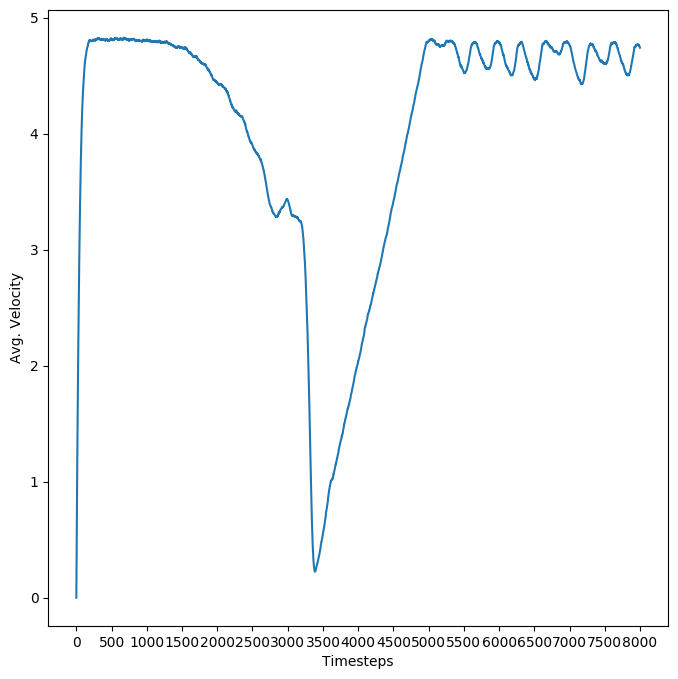

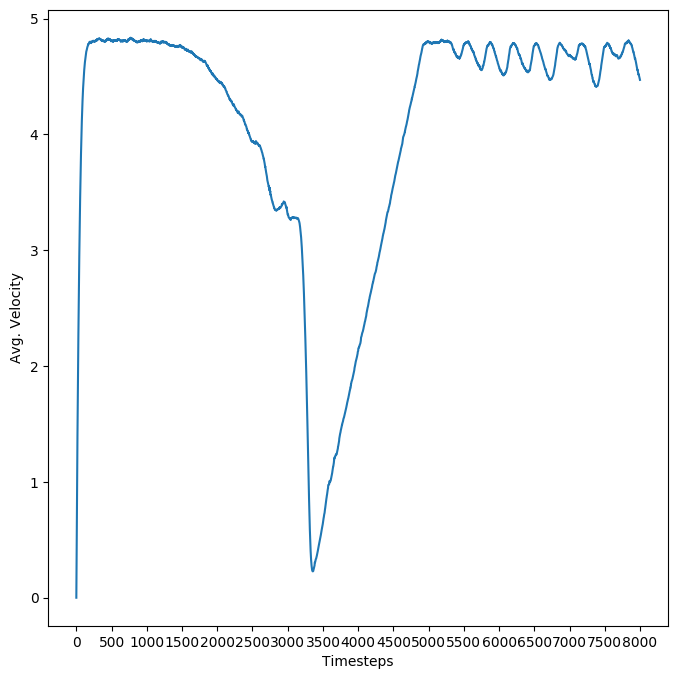

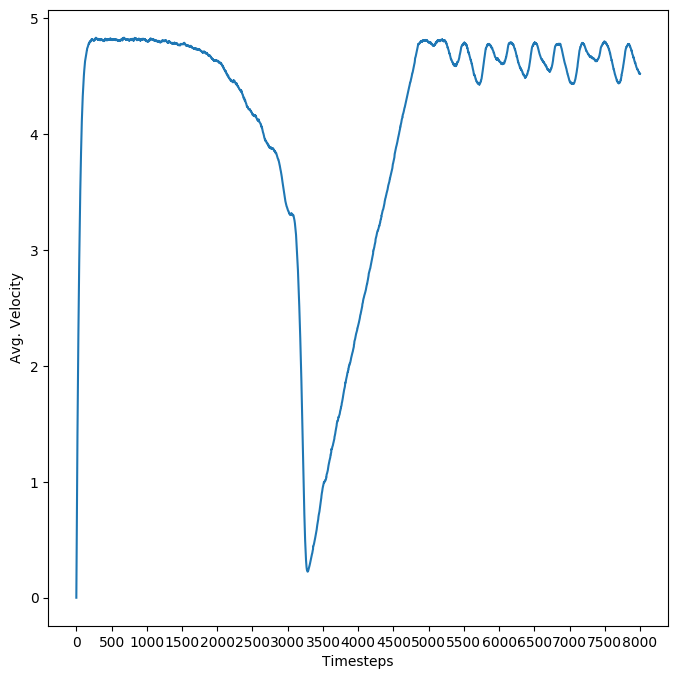

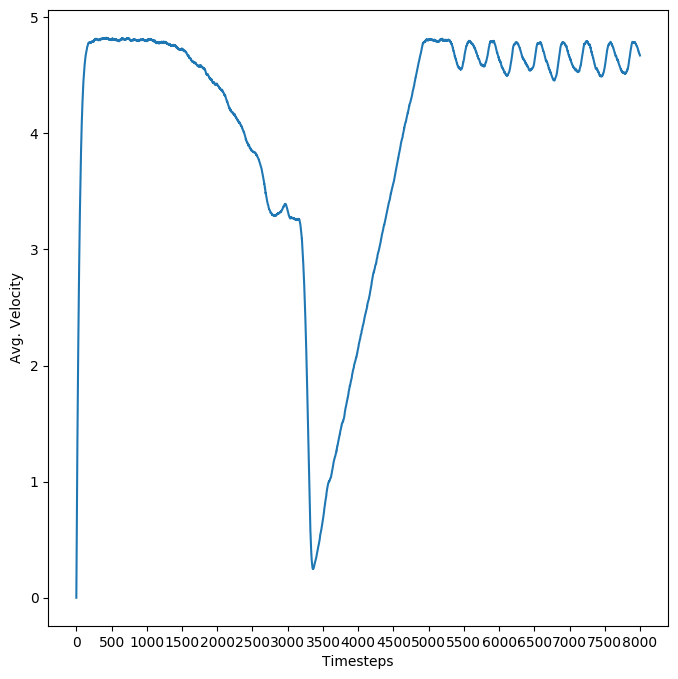

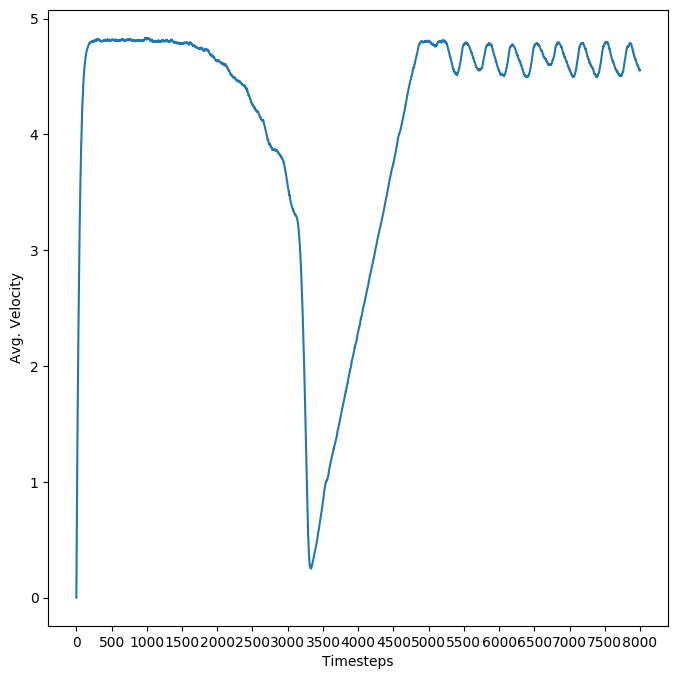

In [4]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/results_lengthX/avg_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("Avg. Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/results_lengthX/avg_velocity{count}.png")
        
        count += 1

## Charting RL Velocity

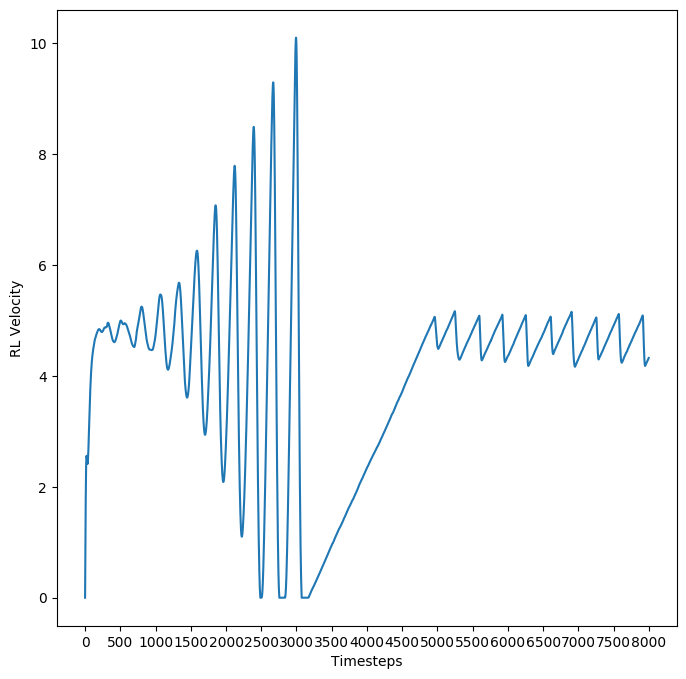

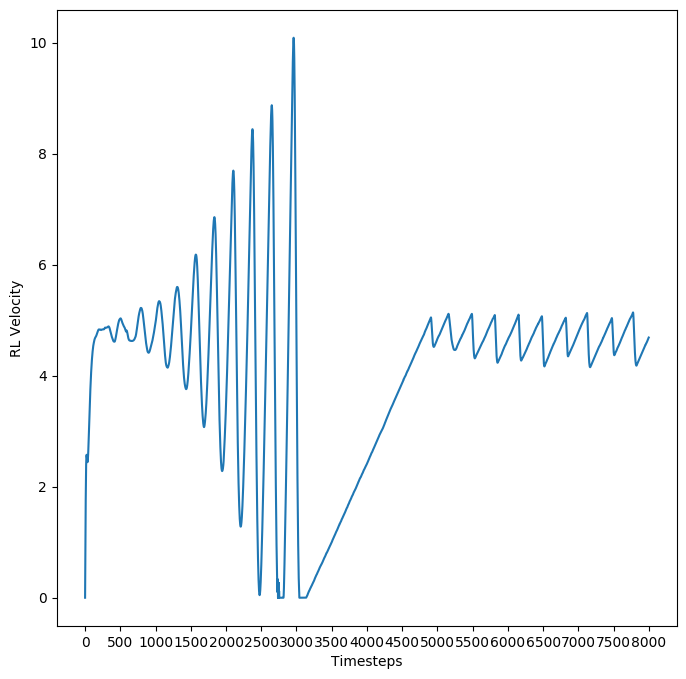

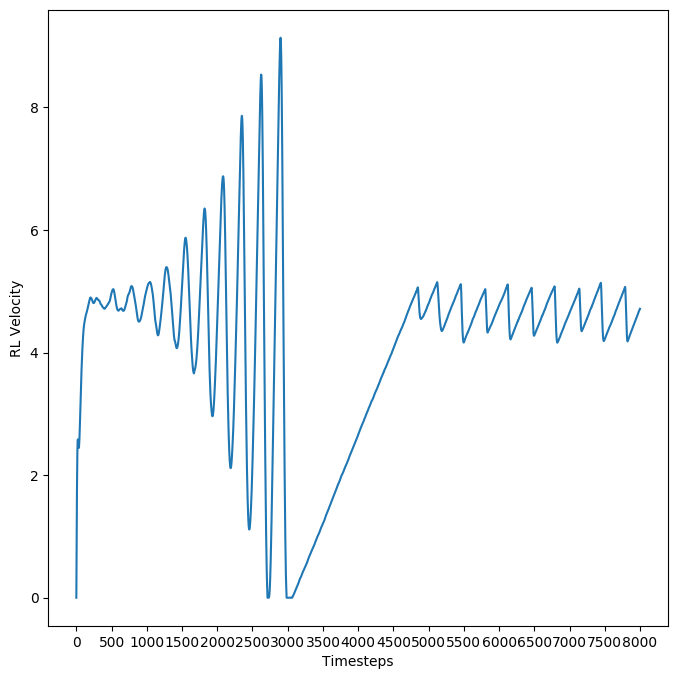

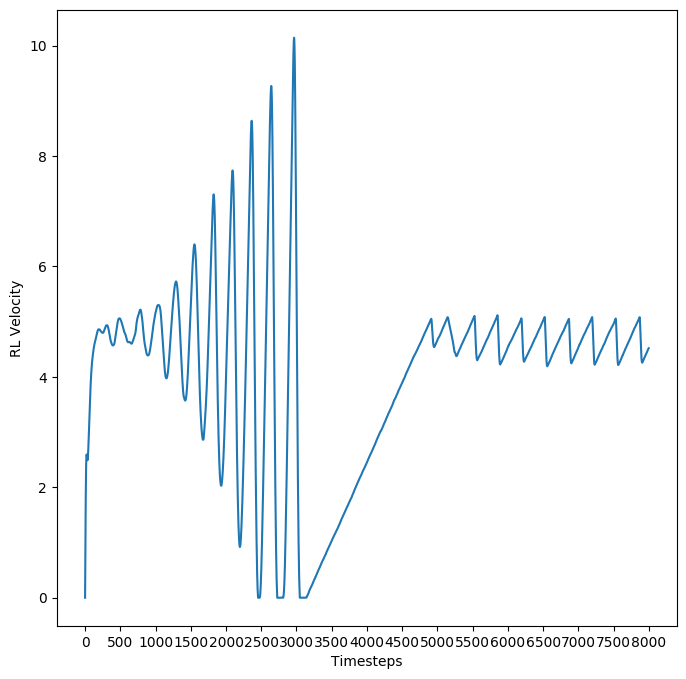

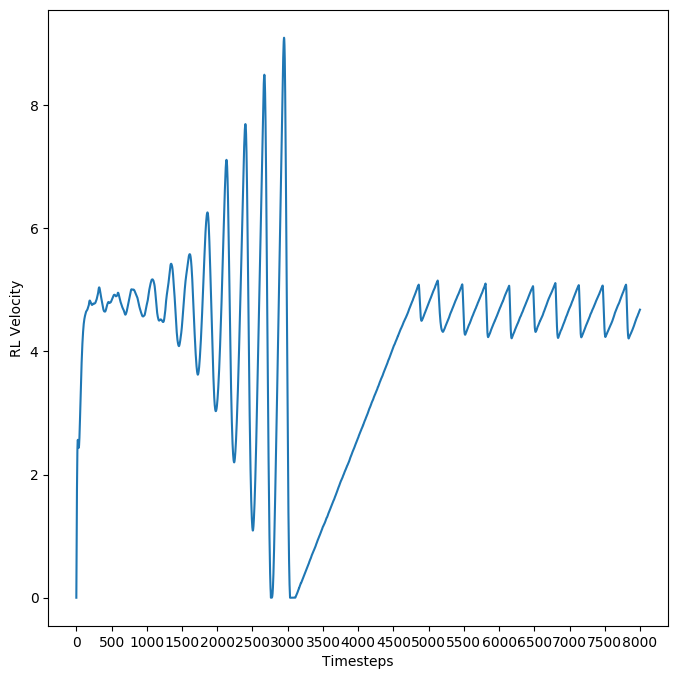

In [5]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/results_lengthX/rl_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/results_lengthX/rl_velocity{count}.png")
        
        count += 1

## Charting RL Realized Acceleration

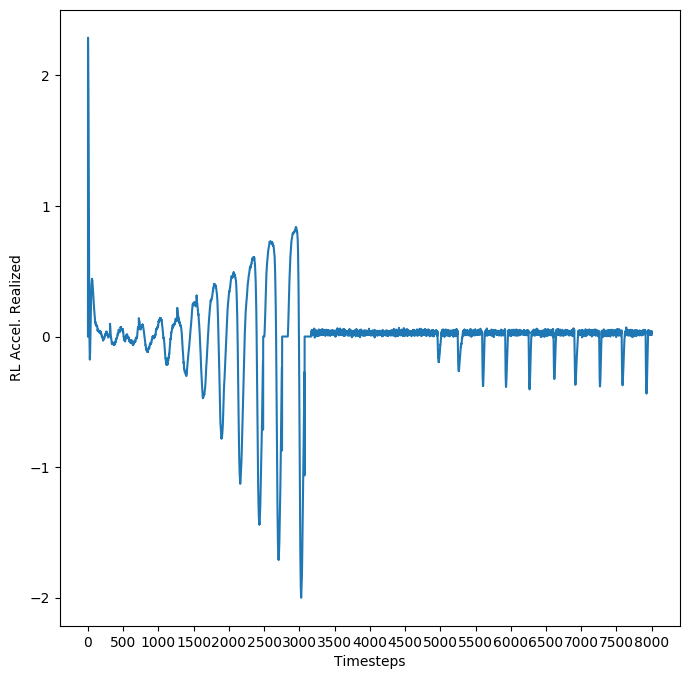

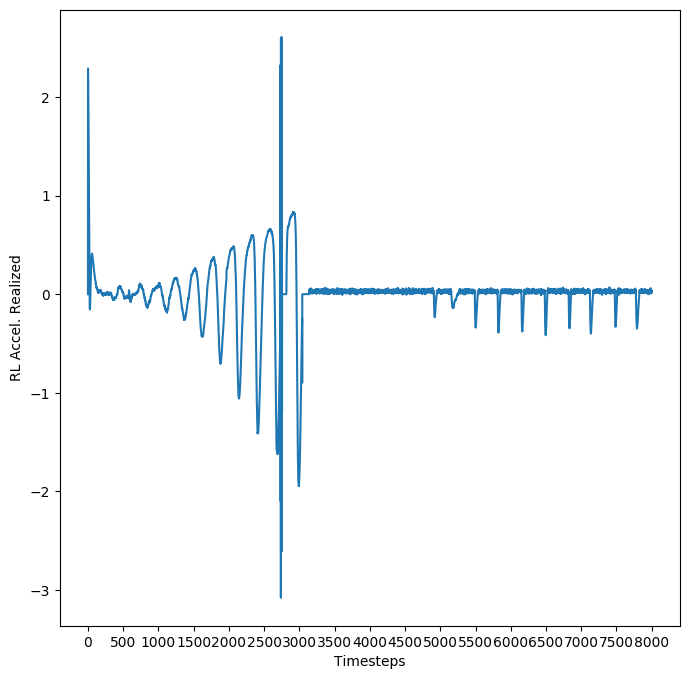

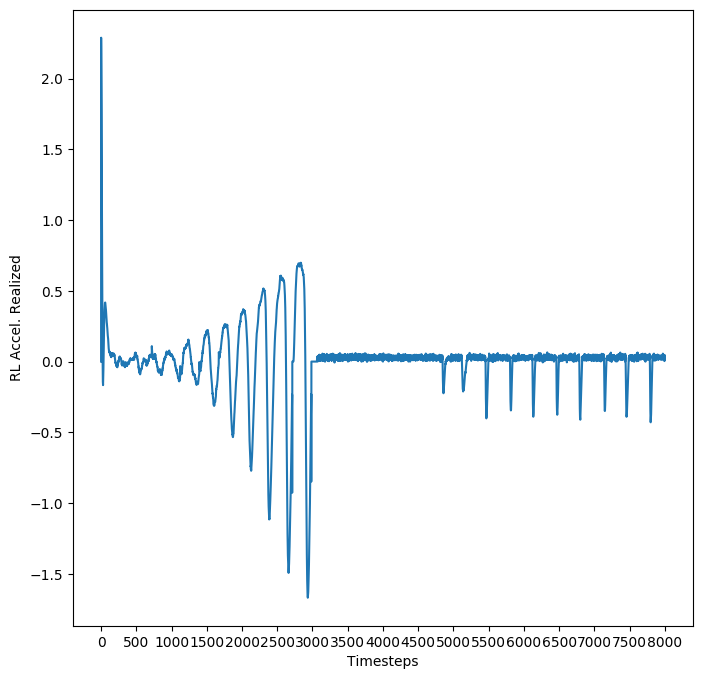

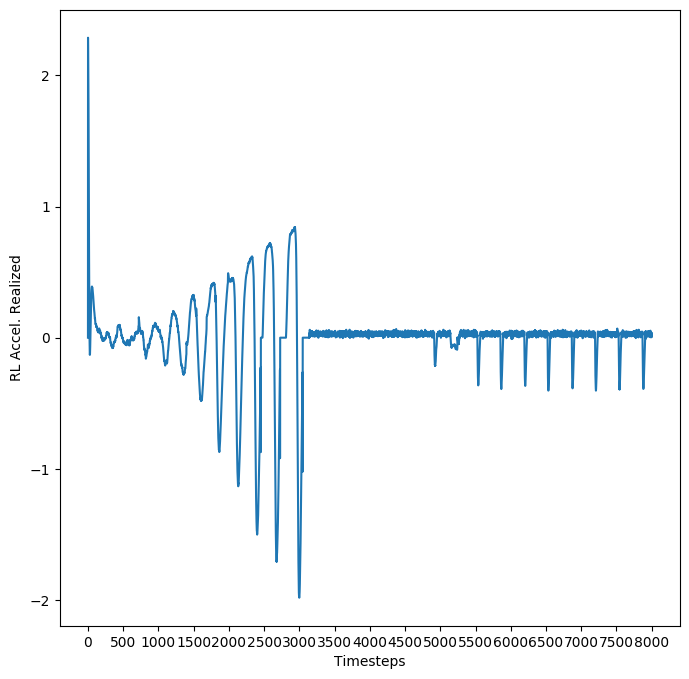

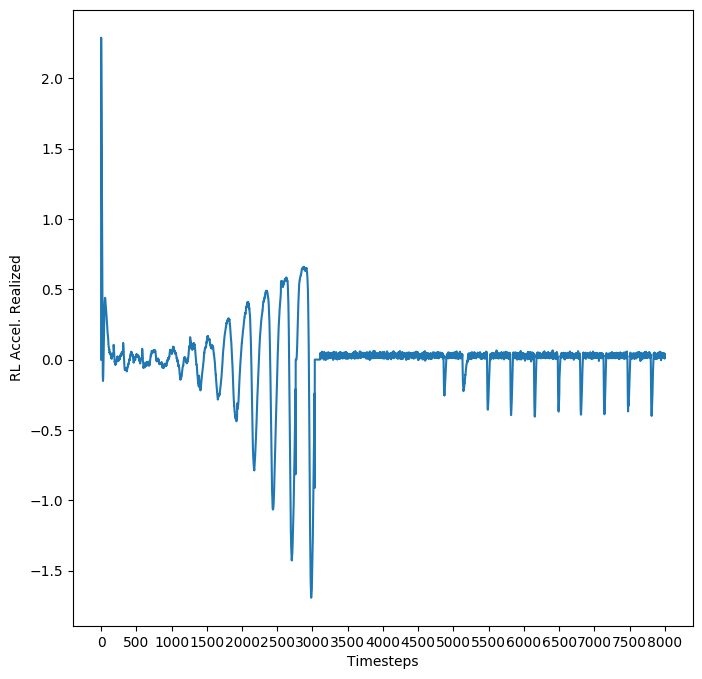

In [6]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/results_lengthX/rl_accel_realized.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Accel. Realized")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/results_lengthX/rl_accel_realized{count}.png")
        
        count += 1